** 算法名称： DBSCAN  ** 
   - __DBSCAN__ 
```   
    sklearn.cluster.DBSCAN(eps=0.5, 
                           min_samples=5, 
                           metric=’euclidean’, 
                           metric_params=None, 
                           algorithm=’auto’, 
                           leaf_size=30, 
                           p=None, 
                           n_jobs=None)
```

**1. 类别**
    
    Cluster

**2. 数学原理及证明**

DBSCAN属于密度聚类，其基本的思想是通过是否紧密相连来判断样本点是否属于一个簇。DBSCAN通过基于一组邻域参数(ϵ,MinPts)来表征某处样本是否是紧密的。在介绍算法之前先介绍一些概念。
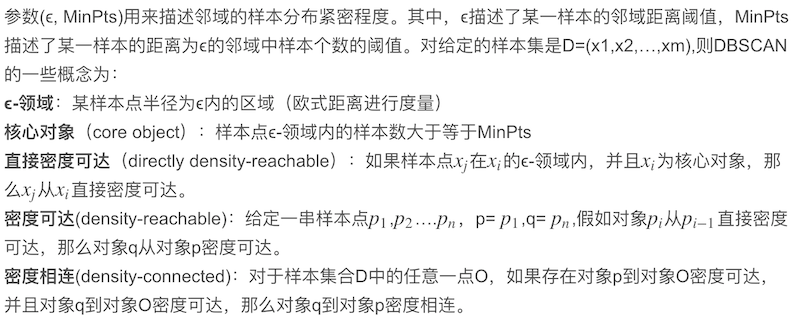

    
  - __DBSCAN的基本算法流程__
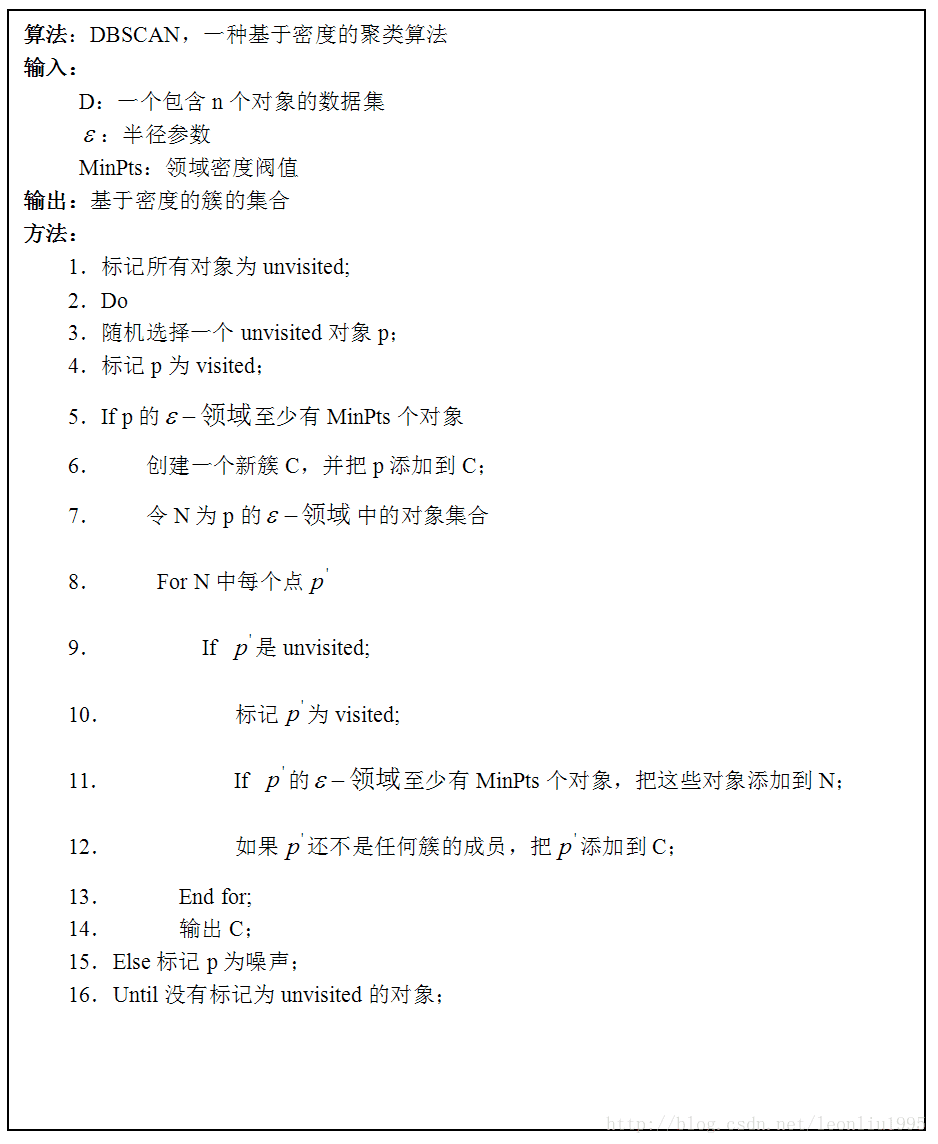

**3. 算法关键参数及特点**
   
   - 怎么还有点没有被聚类？
   
    这情况的出现是因为它不在任何一个核心对象在周围，将会默认为噪声点。


   - 那抗噪音性岂不是很强？
   
    它本身对噪声不敏感，如果是簇内的噪声它完全没有办法。
    

   - 空间形状的影响
   
    DBSCAN不需要知道k的值，而且对输入顺序不敏，它还可以发现任意形状的空间聚类。不过当空间聚类的密度不均匀、聚类间距差相差很大时，聚类质量不佳。 
    
    __DBSCAN的优点：__
    1. 可以解决数据分布特殊（非凸， 互相包络，长条形等）的情况
    2. 对于噪声不敏感
    3. 速度较快，可适用于较大的数据集
    4. 在邻域参数(ϵ,MinPts)给定的情况下，结果是确定的，只要数据进入算法的顺序不变，与初始值无关，这里就和KMeans不同
    5. 不需要指定簇的个数

    __缺点：__
    1. 簇之间密度差距过大时效果不好，因为对整个数据集我们使用的是一组邻域参数
    2. 数据集较大的时候很消耗内存，目前在scikit-learn中已经可以使用ball-trees 和 kd-trees来确定邻居点（可以看出找出点的邻域内有几个点是DBSCAN最基本，最多的操作）,但是在默认情况下是不使用他们的，而是使用很消耗内存的距离矩阵。
    3. 对于高维数据距离的计算会比较麻烦，造成“维数灾难”

**4. Refer to**
  - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
  - https://blog.csdn.net/leonliu1995/article/details/78944798
  - https://blog.csdn.net/qq_39388410/article/details/78239696
 

Python version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.1
matplotlib version: 2.0.2
numpy version: 1.12.1
scipy version: 0.19.0
IPython version: 5.3.0
sklearn version: 0.18.1

 Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [

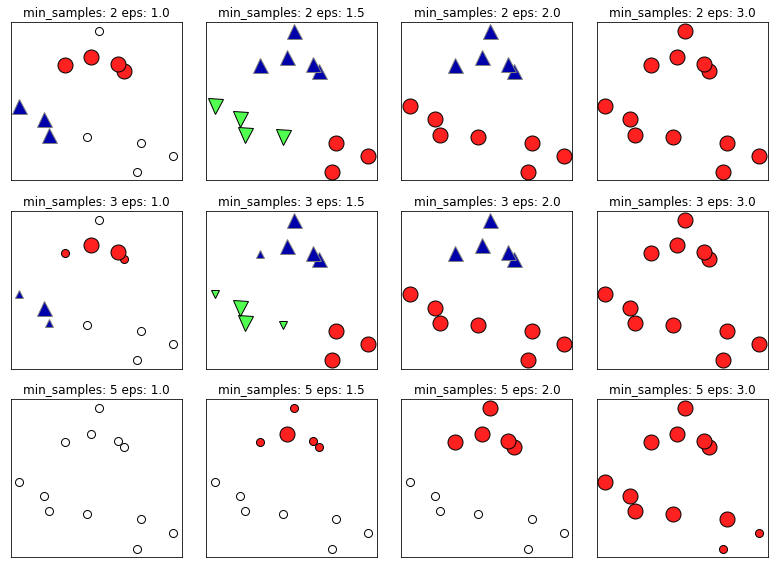

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import mglearn
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


# generate synhetic two-dimensional data
X, y = make_blobs(random_state=0, n_samples=12)

# build the cluster model
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("\n Cluster memberships:\n{}".format(clusters))
mglearn.plots.plot_dbscan()
plt.show()

DBSCAN:
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

 Cluster assignment by DBSCAN using default eps=0.5


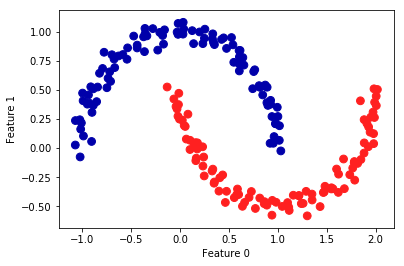

In [2]:
# generate two moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
print("DBSCAN:\n{}".format(dbscan))
print("\n Cluster assignment by DBSCAN using default eps=0.5")
plt.scatter(X[:,0], X[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

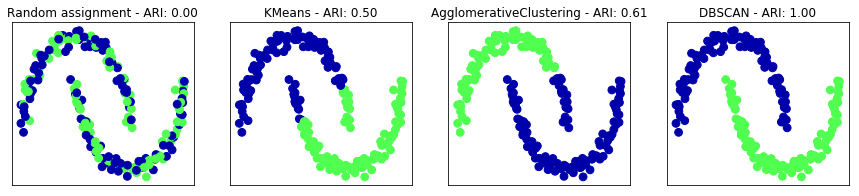

In [3]:
# We use ARI <adjusted rand index> and NMI <normalized mutual information> to evaluate the clustering algorithm

from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithm to use 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

In [4]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accracy is zero
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# the ARI is 1, as the clustering is exactly the samel
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


## Evaluating Clustering without ground truth

The sihouette score computes the compactness of a cluster where higher is better with a perfect score of 1

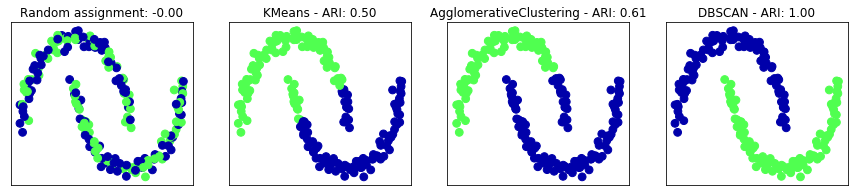

In [8]:
from sklearn.metrics.cluster import silhouette_score

# generate two moons data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

# make a list of algorithm to use 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

## Example 

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


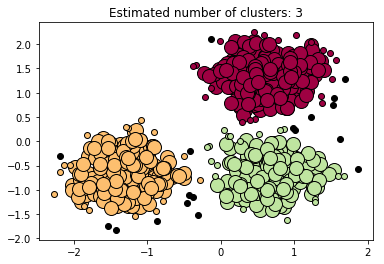

In [3]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 

#满足高斯分布的点 
from sklearn.datasets.samples_generator import make_blobs 

from sklearn.preprocessing import StandardScaler 

#3个数据集中心点 
centers = [[1, 1], [-1, -1], [1, -1]] 
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0) 

#标准化数据 
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
labels = db.labels_ 
#聚类数k，忽略未被聚类的噪音点 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

#输出各种度量信息 
print('Estimated number of clusters: %d' % n_clusters_) 
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

#聚出簇的同类精度 
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

#同类簇被聚精度 
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

#上面两者的居中度量（相乘除以和） 
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))

#调整兰德系数 
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))

#调整互信息 
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

#判别度量值 
import matplotlib.pyplot as plt 
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        #未聚类点为黑色 
        col = [0, 0, 0, 1] 
    class_member_mask = (labels == k) 
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14) 
    
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6) 

plt.title('Estimated number of clusters: %d' % n_clusters_) 
plt.show() 
